In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Cleveland Heart Disease dataset
# Raw data file, missing values marked as "?"
df = pd.read_csv("../data/heart_disease.csv", header=None, na_values="?")

# Assign column names
df.columns = [
    "age",       # 0: Age in years
    "sex",       # 1: Sex (1 = male, 0 = female)
    "cp",        # 2: Chest pain type
    "trestbps",  # 3: Resting blood pressure
    "chol",      # 4: Serum cholesterol
    "fbs",       # 5: Fasting blood sugar > 120 mg/dl
    "restecg",   # 6: Resting electrocardiographic results
    "thalach",   # 7: Maximum heart rate achieved
    "exang",     # 8: Exercise induced angina
    "oldpeak",   # 9: ST depression induced by exercise
    "slope",     # 10: Slope of the peak exercise ST segment
    "ca",        # 11: Number of major vessels (0-3) colored by fluoroscopy
    "thal",      # 12: Thalassemia
    "target"     # 13: Presence of heart disease (label)
]

# Quick check
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (597, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
# Check for missing values in each column
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          295
thal        268
target        0
dtype: int64


In [8]:
from sklearn.impute import SimpleImputer

# --------------------------
# Impute missing values
# --------------------------

# Separate numeric and categorical features
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]

# Numeric imputer: fill missing values with median (robust to outliers)
num_imputer = SimpleImputer(strategy="median")

# Categorical imputer: fill missing values with most frequent value
cat_imputer = SimpleImputer(strategy="most_frequent")

# Apply imputation
df[numeric_features] = num_imputer.fit_transform(df[numeric_features])
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

# Check that there are no missing values left
print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
# (Optional): Check data types and non-null counts to confirm that imputation worked
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       597 non-null    float64
 1   sex       597 non-null    float64
 2   cp        597 non-null    float64
 3   trestbps  597 non-null    float64
 4   chol      597 non-null    float64
 5   fbs       597 non-null    float64
 6   restecg   597 non-null    float64
 7   thalach   597 non-null    float64
 8   exang     597 non-null    float64
 9   oldpeak   597 non-null    float64
 10  slope     597 non-null    float64
 11  ca        597 non-null    float64
 12  thal      597 non-null    float64
 13  target    597 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 65.4 KB



Target value counts:
 target
0    352
1    161
2     36
3     35
4     13
Name: count, dtype: int64

Target value percentages:
 target
0    0.589615
1    0.269682
2    0.060302
3    0.058626
4    0.021776
Name: proportion, dtype: float64


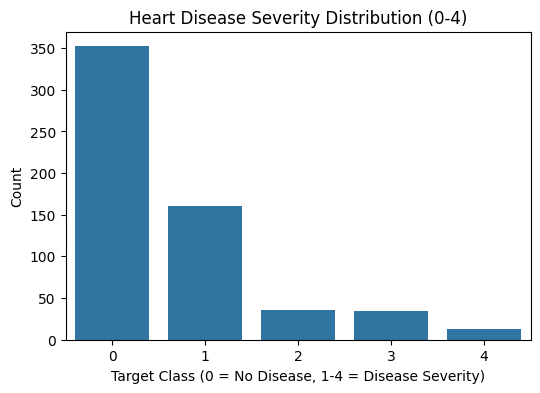

In [10]:
# Explore target variable distribution
# Target classes: 0 = no disease, 1-4 = increasing severity of heart disease
print("\nTarget value counts:\n", df['target'].value_counts())

# Percentage distribution
print("\nTarget value percentages:\n", df['target'].value_counts(normalize=True))

# Visualize target distribution
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df)
plt.title("Heart Disease Severity Distribution (0-4)")
plt.xlabel("Target Class (0 = No Disease, 1-4 = Disease Severity)")
plt.ylabel("Count")
plt.show()


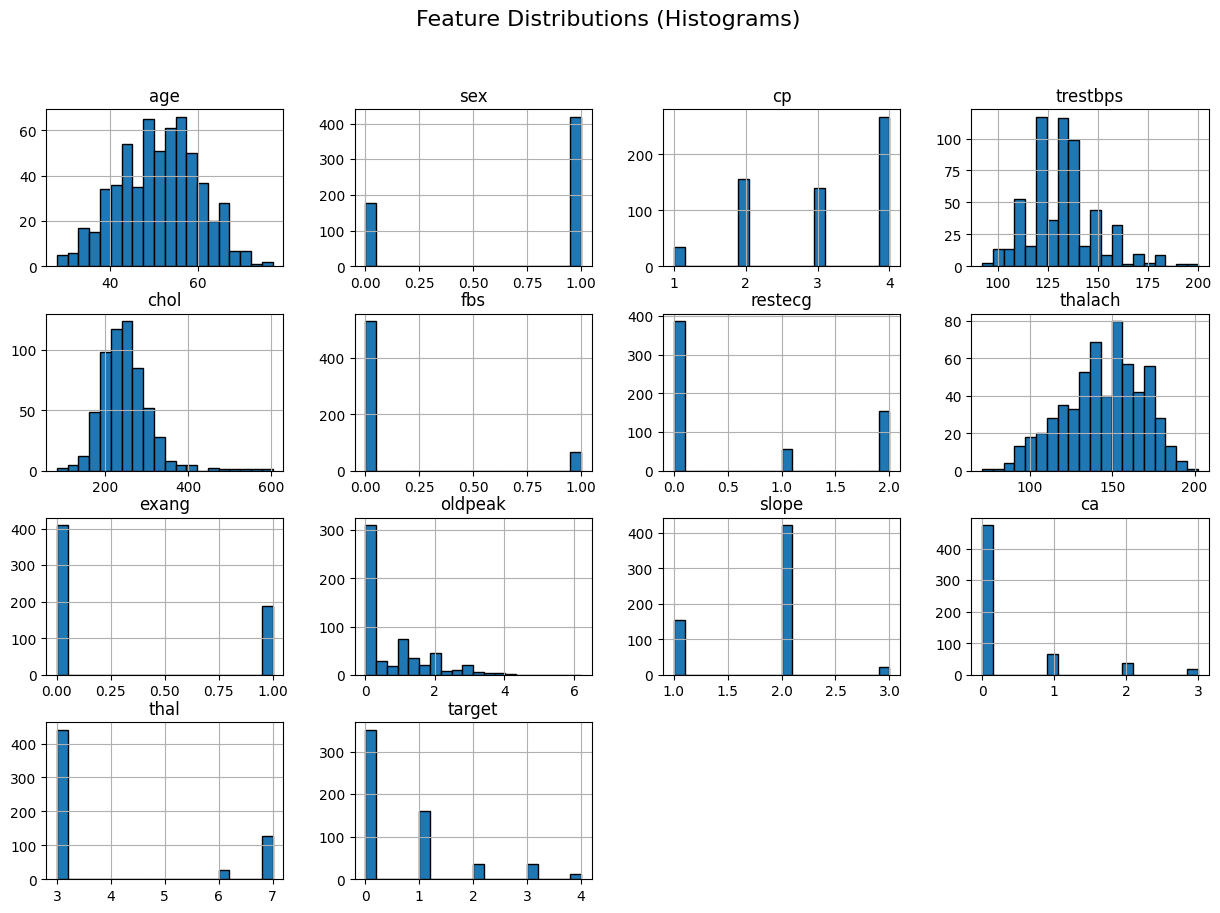

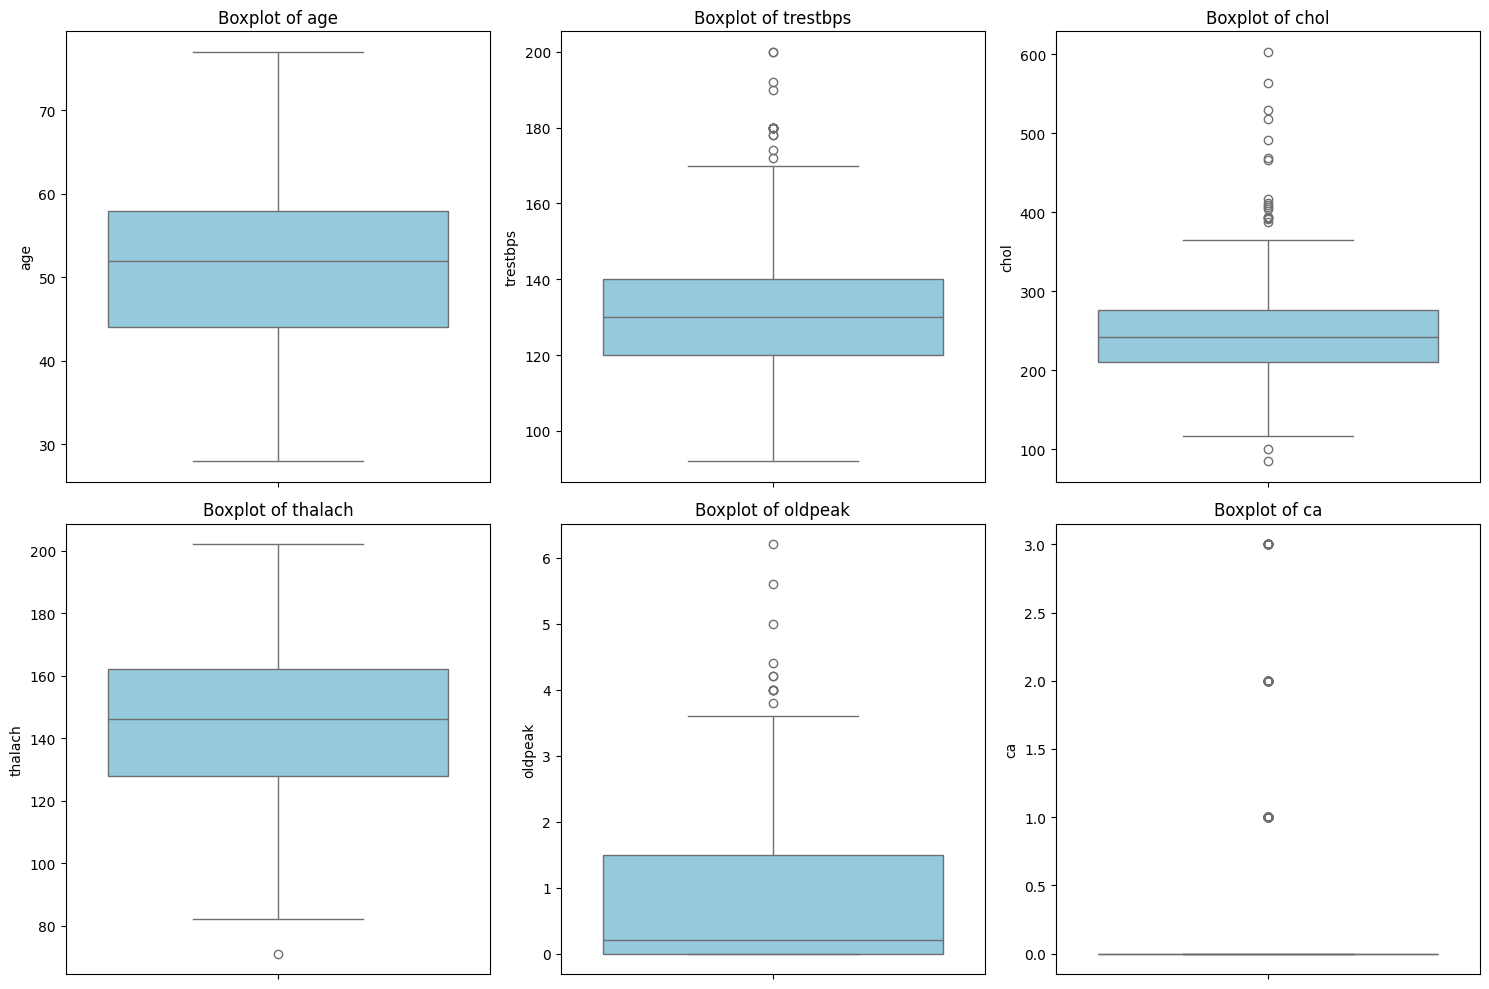

In [11]:
# Visualize numeric feature distributions

# --------------------------
# Histograms
# --------------------------
# Histograms show the distribution of each numeric feature
# Useful for spotting skewness, multiple peaks, or unusual ranges
df.hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions (Histograms)", fontsize=16)
plt.show()

# --------------------------
# Boxplots
# --------------------------
# Boxplots show median, quartiles, and outliers
# Useful for detecting extreme values in numeric features
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


Preprocessed shape: (597, 20)


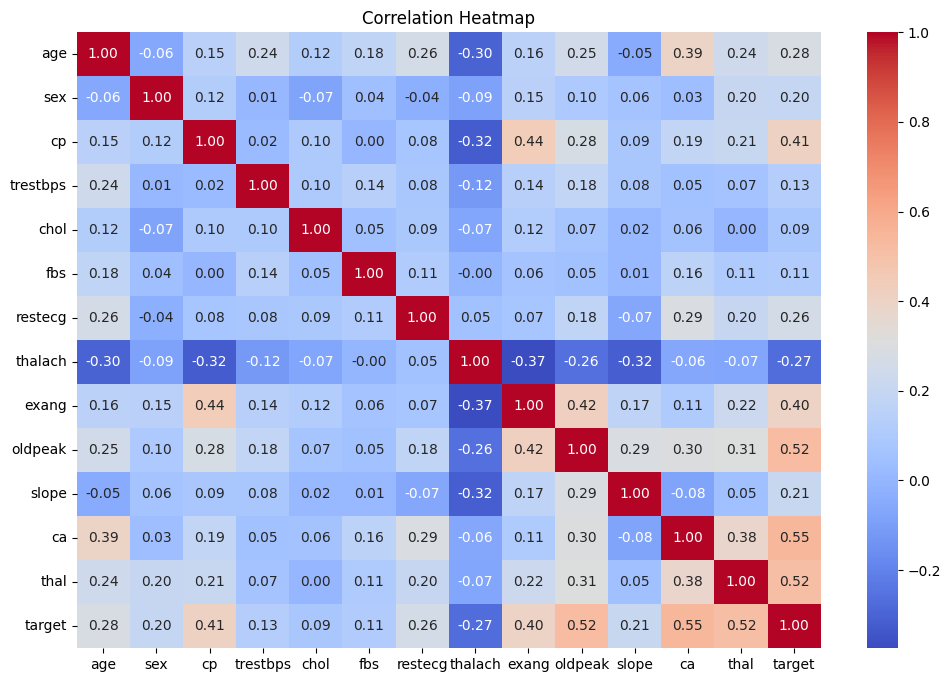

In [12]:
# Preprocessing for modeling

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Define numeric and categorical features
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
categorical_features = ["cp", "thal", "slope"]

# Preprocessing pipeline: scale numeric features, one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features)
    ],
    remainder="passthrough"  # keep other columns (if any) as-is
)

# Apply preprocessing
X_prep = preprocessor.fit_transform(X)
print("Preprocessed shape:", X_prep.shape)

# --------------------------
# Exploratory Data Analysis (EDA)
# --------------------------
# Correlation heatmap to check linear relationships between features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [13]:
# Recursive Feature Elimination (RFE) with Random Forest
# Purpose: Find the optimal number of features for modeling using cross-validation

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Base model for RFE
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Try different numbers of features from 5 up to total number of features
feature_range = range(5, X_prep.shape[1]+1)
cv_scores = []

for n in feature_range:
    rfe = RFE(estimator=model, n_features_to_select=n)
    X_rfe = rfe.fit_transform(X_prep, y)
    
    # Evaluate the selected features using 5-fold cross-validation with F1 score
    scores = cross_val_score(model, X_rfe, y, cv=5, scoring='f1_macro')  # use f1_macro for multiclass
    cv_scores.append(scores.mean())

# Identify the best number of features
best_n = feature_range[np.argmax(cv_scores)]
print(f"Best number of features: {best_n} with CV F1 score: {max(cv_scores):.4f}")


Best number of features: 9 with CV F1 score: 0.3530


In [14]:
# Apply RFE with the best number of features from the step before
# Purpose: Reduce dimensionality and select the most important features for modeling

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# --- Initialize model for RFE ---
model = RandomForestClassifier(n_estimators=250, random_state=42)

# --- Choose number of features to select ---
n_features_to_select = 9

# --- Fit RFE on preprocessed features ---
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
rfe.fit(X_prep, y)

# --- Get boolean mask of selected features ---
selected_mask = rfe.support_

# --- Map mask to actual feature names ---
# Categorical features after one-hot encoding
cat_features_ohe = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names (numeric + one-hot + passthrough columns)
all_feature_names = numeric_features + list(cat_features_ohe) + ['sex', 'fbs', 'exang', 'restecg']

# List of selected features
selected_features = [name for i, name in enumerate(all_feature_names) if selected_mask[i]]
print("Selected Features by RFE:")
print(selected_features)

# --- Create reduced dataset with only selected features ---
X_reduced = X_prep[:, selected_mask]
print("Shape of reduced dataset:", X_reduced.shape)


Selected Features by RFE:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp_4.0', 'thal_3.0', 'restecg']
Shape of reduced dataset: (597, 9)


In [15]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
import numpy as np

# -------------------------------
# Purpose: Create training and test sets with stratification
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------------------
# Step: Handle class imbalance with SMOTETomek
# Purpose: Balance minority and majority classes in the training set
# -------------------------------
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)

print("Resampled training set shape:", X_res.shape)
print("Test set shape:", X_test.shape)


Resampled training set shape: (1387, 9)
Test set shape: (120, 9)


Logistic Regression best params: {'C': 0.1}
Decision Tree best params: {'max_depth': 10, 'min_samples_split': 2}
Random Forest best params: {'max_depth': None, 'n_estimators': 100}
SVM best params: {'C': 10, 'kernel': 'rbf'}


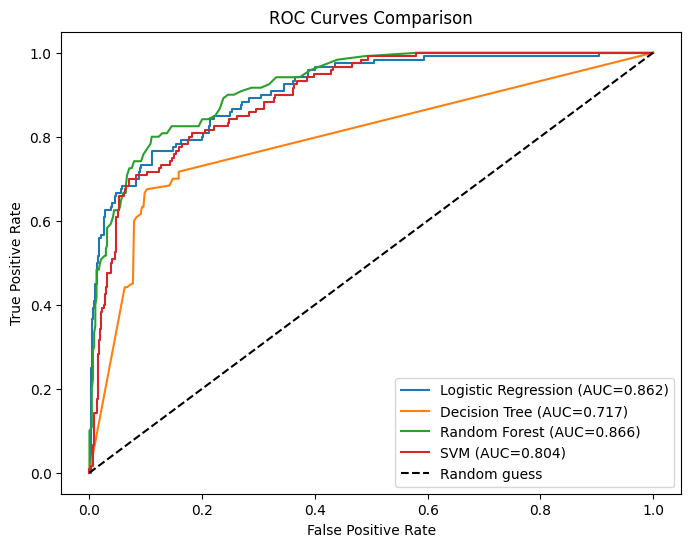


Model Performance Summary:

                     Accuracy  Precision    Recall        F1   ROC AUC
Logistic Regression  0.691667   0.715272  0.691667  0.699384  0.862158
Decision Tree        0.633333   0.652379  0.633333  0.640658  0.717377
Random Forest        0.675000   0.660877  0.675000  0.666488  0.865738
SVM                  0.700000   0.682387  0.700000  0.691004  0.804095


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# --------------------------
# Define models and hyperparameter grids
# --------------------------
param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "Decision Tree": {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [5, 10, None]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=42)
}

# --------------------------
# Hyperparameter tuning with GridSearchCV
# --------------------------
tuned_models = {}
for name, model in models.items():
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring="f1_weighted", n_jobs=-1)
    grid.fit(X_res, y_res)
    tuned_models[name] = grid.best_estimator_
    print(f"{name} best params: {grid.best_params_}")

# --------------------------
# Evaluate models and plot ROC curves
# --------------------------
results = {}
plt.figure(figsize=(8,6))

# Binarize labels for multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Collect evaluation metrics
    results[name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average="weighted"),
        recall_score(y_test, y_pred, average="weighted"),
        f1_score(y_test, y_pred, average="weighted"),
        roc_auc_score(y_test_bin, y_proba, multi_class="ovr", average="weighted")
    ]

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
    plt.plot(fpr, tpr, label=f"{name} (AUC={results[name][4]:.3f})")

# Plot baseline ROC
plt.plot([0,1], [0,1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()

# --------------------------
# Display metrics in a table
# --------------------------
results_df = pd.DataFrame(results, index=["Accuracy","Precision","Recall","F1","ROC AUC"]).T
print("\nModel Performance Summary:\n")
print(results_df)


Logistic Regression: CV F1-weighted mean=0.617, std=0.030
Decision Tree: CV F1-weighted mean=0.808, std=0.020
Random Forest: CV F1-weighted mean=0.896, std=0.015
SVM: CV F1-weighted mean=0.902, std=0.006

=== Stacking Ensemble Test Performance ===
Accuracy: 0.683
Precision: 0.662
Recall: 0.683
F1-score: 0.672
ROC AUC: 0.853


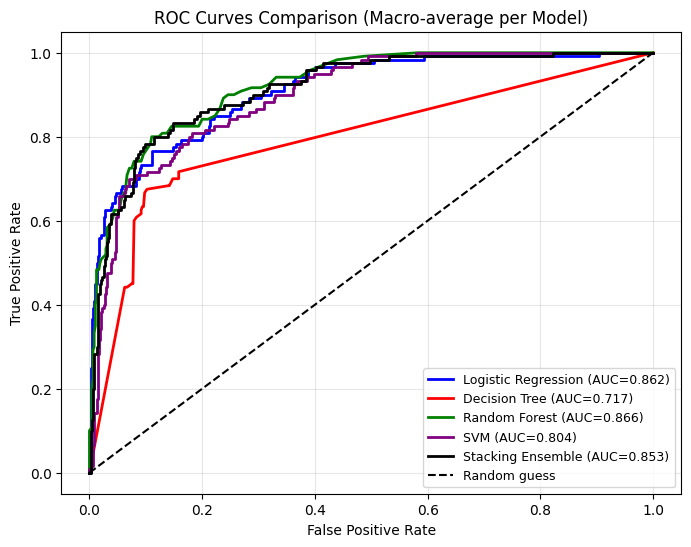

In [17]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# --------------------------
# Cross-validation for individual models
# --------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

for name, model in tuned_models.items():
    scores = cross_val_score(model, X_res, y_res, cv=cv, scoring="f1_weighted", n_jobs=-1)
    cv_results[name] = [scores.mean(), scores.std()]
    print(f"{name}: CV F1-weighted mean={scores.mean():.3f}, std={scores.std():.3f}")

# --------------------------
# Stacking Ensemble using the best-performing models
# --------------------------
stacking_model = StackingClassifier(
    estimators=[
        ("lr", tuned_models["Logistic Regression"]),
        ("rf", tuned_models["Random Forest"]),
        ("dt", tuned_models["Decision Tree"])
    ],
    final_estimator=LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42),
    cv=cv,
    n_jobs=-1
)

stacking_model.fit(X_res, y_res)

# --------------------------
# Evaluate stacking model on test set
# --------------------------
y_pred = stacking_model.predict(X_test)
y_proba = stacking_model.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
auc = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), y_proba, multi_class="ovr", average="weighted")

print("\n=== Stacking Ensemble Test Performance ===")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC AUC: {auc:.3f}")

# --------------------------
# Plot ROC curves for all models including stacking
# --------------------------
plt.figure(figsize=(8,6))

# Binarize y for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Colors for clarity
model_colors = {
    "Logistic Regression": "blue",
    "Decision Tree": "red",
    "Random Forest": "green",
    "SVM": "purple",
    "Stacking Ensemble": "black"
}

# Plot ROC for each model
for name, model in {**tuned_models, "Stacking Ensemble": stacking_model}.items():
    y_proba = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
    auc_score = roc_auc_score(y_test_bin, y_proba, multi_class="ovr", average="weighted")
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})", linewidth=2, color=model_colors.get(name))

# Random guess baseline
plt.plot([0, 1], [0, 1], "k--", label="Random guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison (Macro-average per Model)")
plt.legend(fontsize=9, loc="lower right")
plt.grid(alpha=0.3)
plt.show()


=== Random Forest Final Model Performance ===
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        71
           1       0.81      0.53      0.64        32
           2       0.21      0.43      0.29         7
           3       0.38      0.43      0.40         7
           4       0.00      0.00      0.00         3

    accuracy                           0.72       120
   macro avg       0.45      0.46      0.44       120
weighted avg       0.75      0.72      0.73       120

Weighted ROC AUC: 0.883


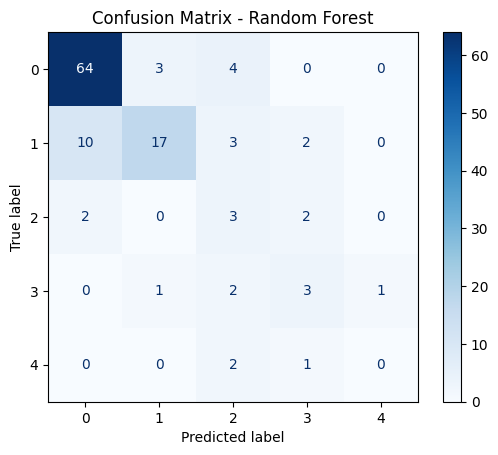

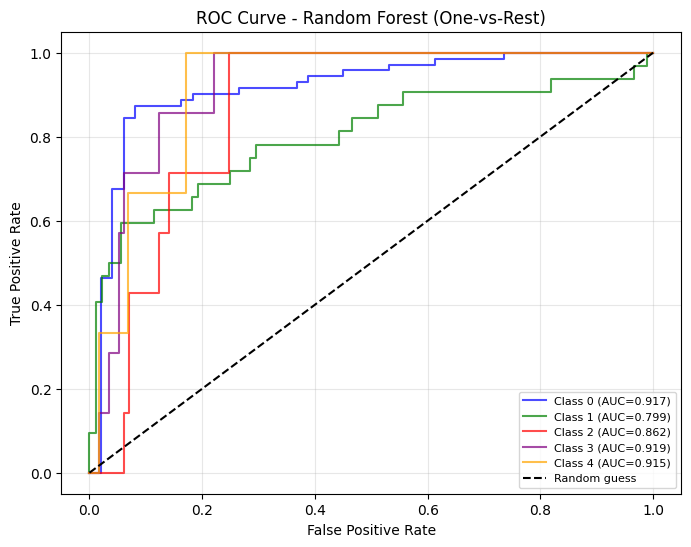

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# --------------------------
# Define and train the final Random Forest model
# --------------------------
rf_final = RandomForestClassifier(
    n_estimators=150,       # tuned
    max_depth=5,           # tuned
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
    max_features = "sqrt"
)

rf_final.fit(X_res, y_res)

# --------------------------
# Predictions
# --------------------------
y_pred = rf_final.predict(X_test)
y_proba = rf_final.predict_proba(X_test)

# --------------------------
# Performance metrics
# --------------------------
print("=== Random Forest Final Model Performance ===")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Weighted ROC AUC (multiclass)
auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="weighted")
print(f"Weighted ROC AUC: {auc:.3f}")

# --------------------------
# Confusion Matrix
# --------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# --------------------------
# ROC Curves (One-vs-Rest for multiclass)
# --------------------------
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

colors = cycle(["blue", "green", "red", "purple", "orange", "cyan", "magenta"])

plt.figure(figsize=(8,6))
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, color=color, alpha=0.7,
             label=f"Class {classes[i]} (AUC={roc_auc_score(y_test_bin[:, i], y_proba[:, i]):.3f})")

# Random guess baseline
plt.plot([0,1], [0,1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (One-vs-Rest)")
plt.legend(fontsize=8, loc="best")
plt.grid(alpha=0.3)
plt.show()


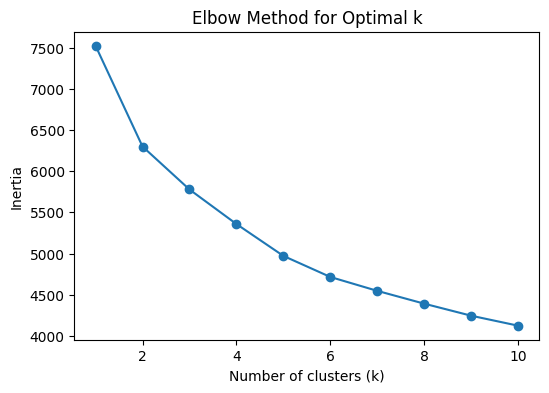

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from itertools import cycle

# Prepare features
X = df.drop("target", axis=1)
y = df["target"]

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Optional: PCA for dimensionality reduction
X_pca = PCA(n_components=0.95).fit_transform(X_scaled)

# ----------------------
# K-Means Clustering
# ----------------------
# Determine optimal k using Elbow method
inertia = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_pca).inertia_ for k in range(1, 11)]

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


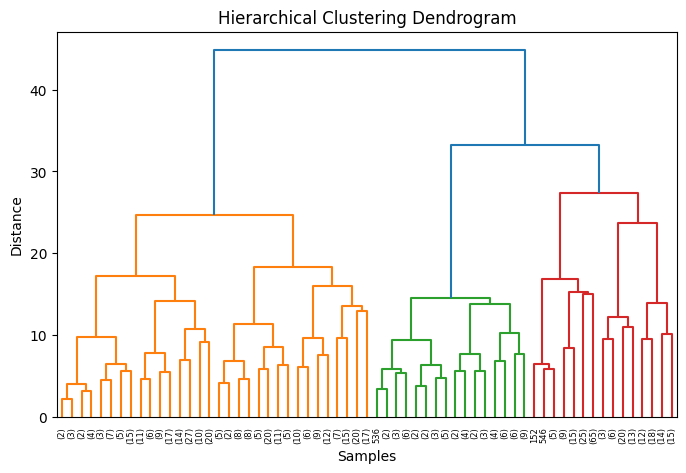

KMeans ARI: 0.271
Hierarchical ARI: 0.350


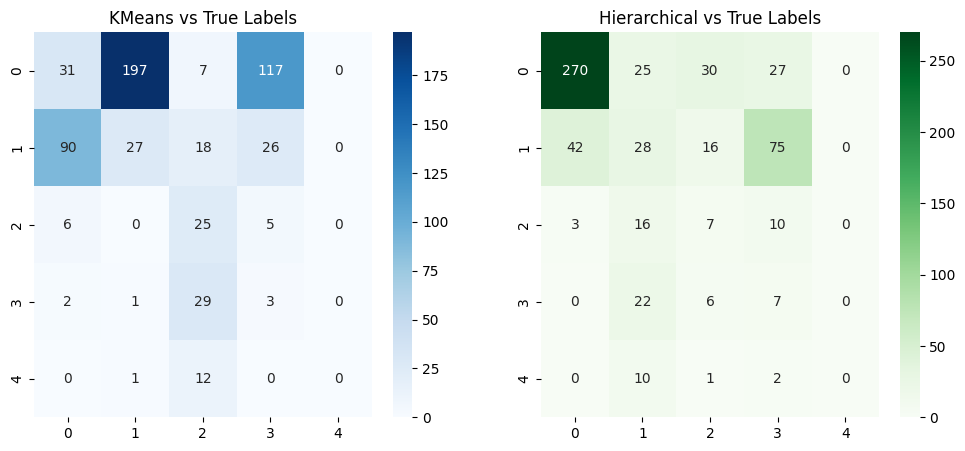

In [20]:
# ----------------------
# Clustering with optimal k
# ----------------------
optimal_k = 4  # from elbow method

# K-Means
kmeans_labels = KMeans(n_clusters=optimal_k, random_state=42, n_init=10).fit_predict(X_pca)

# Hierarchical 
linkage_matrix = linkage(X_pca, method="ward")
hier_labels = AgglomerativeClustering(n_clusters=optimal_k, linkage="ward").fit_predict(X_pca)

# ----------------------
# Dendrogram
# ----------------------
plt.figure(figsize=(8,5))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# ----------------------
# Evaluation: ARI
# ----------------------
print(f"KMeans ARI: {adjusted_rand_score(y, kmeans_labels):.3f}")
print(f"Hierarchical ARI: {adjusted_rand_score(y, hier_labels):.3f}")

# ----------------------
# Evaluation: Confusion Matrices
# ----------------------
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y, kmeans_labels), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("KMeans vs True Labels")

sns.heatmap(confusion_matrix(y, hier_labels), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Hierarchical vs True Labels")

plt.show()
